In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setting Working Directory Raw
os.chdir('C:/Users/ricar/OneDrive/Escritorio/Agilos_case/data/raw_data/HR_CASE_DATA_CSV_2')

## **EPLORATORY DATA ANALYSIS (EDA)**

Overall Analysis of datasets to identify required preprocessing.

In [5]:
# Loading The Datasets
absence_type = pd.read_csv('Absence_Type.csv',sep=";")  
absences = pd.read_csv("ABSENCES.csv", sep=";")
contract_basis = pd.read_csv("CONTRACT_BASIS.csv", sep=";")
postcodes = pd.read_csv("POSTCODES.csv", sep=";")
salary_statement = pd.read_csv("SALARY_STATEMENT.csv", sep=";")
work_plan = pd.read_csv("WORK_PLAN.csv", sep=";")

**Data types and non-nulls**


In [6]:
print(f"{absences.info()} {contract_basis.info()} {postcodes.info()} {salary_statement.info()} {work_plan.info()}")

# contract_basis: Shows null values 
# salary_statement: Salaries are treated as objects not floats 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100815 entries, 0 to 100814
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Firm ID           100815 non-null  int64 
 1   Department ID     100815 non-null  int64 
 2   Category ID       100815 non-null  int64 
 3   Person ID         100815 non-null  int64 
 4   Year              100815 non-null  int64 
 5   Quarter           100815 non-null  int64 
 6   Month             100815 non-null  int64 
 7   Date              100815 non-null  object
 8   Period            100815 non-null  object
 9   Qty_Illness_Days  100815 non-null  int64 
 10  Qty_Z0_Days       100815 non-null  int64 
 11  Qty_Z1_Days       100815 non-null  int64 
 12  Qty_Z2_Days       100815 non-null  int64 
 13  Qty_Z3_Days       100815 non-null  int64 
 14  Qty_P0_Days       100815 non-null  int64 
 15  Qty_P1_Days       100815 non-null  int64 
 16  Qty_P2_Days       100815 non-null  int

Some null Values were identified as shown below.

**Null Values**

In [7]:
print(f"{contract_basis.isnull().sum()},\n ------- \n{work_plan.isnull().sum()}")

Contract ZIP Code                0
Firm ID                          0
Department ID                    0
Category ID                      0
Person ID                        0
Contract Start Date              0
Contract End Date             3335
Company Start Date               0
Birth Date                       1
Contract Terminatio Reason    3330
Gender                           0
Nationality                      1
Contract Type                    0
dtype: int64,
 ------- 
FDCP                         0
Valid From                   0
Valid To                     0
Working Days per Week        0
NACE Code                    0
NACE Description         13244
dtype: int64


**Duplicates**

In [10]:
#duplicates 
print(absences.duplicated().sum())
print(contract_basis.duplicated().sum())
print(postcodes.duplicated().sum())
print(salary_statement.duplicated().sum()) # Shows repeted values to inspect
print(work_plan.duplicated().sum())

0
0
0
29172
0


In [12]:
salary_statement[(salary_statement.duplicated()==True)].head()

,FDCP,Gross Salary,Net Salary,Gross Salary 108,Period
1236,0000012195|00|1|0000000052,0,0,0,31/01/2016
1427,0000012195|00|1|0000000008,0,0,0,31/01/2017
1428,0000012195|00|1|0000000039,0,0,0,31/01/2017
1429,0000012195|00|1|0000000028,0,0,0,31/01/2017
1430,0000012195|00|1|0000000002,0,0,0,31/01/2017


After cheking whether Date and Period in "Absences" are duplicated columns, we see that all rows are identical for both columns. Then, one column can be removed. 

**Summary**

In [14]:
print(absences.iloc[:,9:].describe())

       Qty_Illness_Days    Qty_Z0_Days    Qty_Z1_Days    Qty_Z2_Days  \
count     100815.000000  100815.000000  100815.000000  100815.000000   
mean           2.317026       0.488528       0.496513       0.562000   
std            6.043776       1.941347       1.966511       3.208282   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.000000       0.000000       0.000000   
50%            0.000000       0.000000       0.000000       0.000000   
75%            0.000000       0.000000       0.000000       0.000000   
max           30.000000      26.000000      26.000000      30.000000   

         Qty_Z3_Days    Qty_P0_Days    Qty_P1_Days    Qty_P2_Days  \
count  100815.000000  100815.000000  100815.000000  100815.000000   
mean        1.258513       0.001766       0.001766       0.001418   
std         4.952039       0.129615       0.129615       0.150478   
min         0.000000       0.000000       0.000000       0.000000   
25%   

Below there are some boxplots to see if there are extrem values for any of the absences categories.

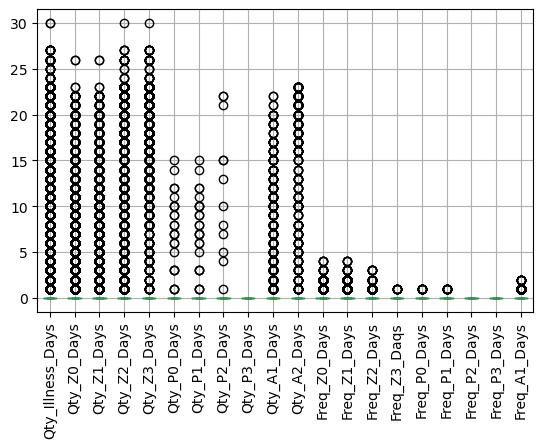

In [15]:
absences.iloc[:,9:29].boxplot()
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()
#absences.iloc[:,9:29].boxplot(rotation=90)

The last two columns need to be transformed to see plots.

In [21]:
print(salary_statement.describe())

                              FDCP Gross Salary Net Salary Gross Salary 108  \
count                       267166       267166     267166           267166   
unique                       29553        75509     105519            50187   
top     0000043838|00|1|0000001146            0          0                0   
freq                           297       125229      65323           184366   

            Period  
count       267166  
unique         315  
top     31/01/2016  
freq         12739  


In [25]:
print(work_plan.describe())

                              FDCP  Valid From    Valid To  \
count                        52854       52854       52854   
unique                       29451        2096        2096   
top     0000048568|00|3|0000014549  01/01/1960  01/01/3000   
freq                           211       29451       29451   

       Working Days per Week NACE Code  \
count                  52854     52854   
unique                   123        39   
top                        5     78200   
freq                   23216     22599   

                                         NACE Description  
count                                               39610  
unique                                                 28  
top     78200 - Activités des agences de travail tempo...  
freq                                                22599  


**1.5. Comments**

**contract_basis data:**
- Null Values:
1. There is one person without Nationality and a birthday
3. Five people registered a 'Contract Termination Reason' but not a 'Contract End Date'.

**Work Plan data:**
- Null Values
1. The 'NACE Description' is missing for 13.224,00 subjects

**Absences:**
- Repeated Column
1. One of the columns "Date" or "Period" will be removed as they are identical.

**Salary Statement:**
- Duplicates
1. 29172 salary records are duplicated

**General**

1. Some Data types need to be set to object (Factors)
2. Unique id variable needs to be created in the "Absences" and "contract_basis" datasets
3. FDCP Values need to be transformed as they have extra "0" values that cause issues to merge the data.